In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

import glob
from PIL import Image
from scipy import interpolate

In [12]:
# Get all the csv files in the current directory
csv_files = glob.glob("../../experiments/logs/simdata/l1_reg/*.csv")

# Create a list of dataframes
dfs = []

# Iterate over the csv files
for csv_file in csv_files:

    # Read the csv file into a dataframe
    df = pd.read_csv(csv_file)
    # Append the dataframe to the list of dataframes
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs)

In [13]:
num_epochs = 5000
df

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
0,0.001013,0.001005,-1.008475e-05,0.000997,0.000986,-0.000016,0.001008,0.001005,-7.643724e-07,0.001010,...,3,True,False,1.0,1,1,0.1,0.01,10,18
1,-0.016352,-0.004578,-1.008475e-05,0.001975,-0.076192,-0.000016,-0.016074,0.038161,-7.643724e-07,0.022178,...,3,True,False,1.0,1,1,0.1,0.01,10,18
2,-0.021126,-0.011592,-1.008475e-05,0.003112,-0.121947,-0.000016,-0.019539,0.064692,-7.643724e-07,0.028929,...,3,True,False,1.0,1,1,0.1,0.01,10,18
3,-0.024382,-0.015459,-1.008475e-05,0.002227,-0.144641,-0.000016,-0.020365,0.079785,-7.643724e-07,0.033037,...,3,True,False,1.0,1,1,0.1,0.01,10,18
4,-0.027067,-0.017683,-1.008475e-05,0.000193,-0.154283,-0.000016,-0.019692,0.086994,-7.643724e-07,0.035474,...,3,True,False,1.0,1,1,0.1,0.01,10,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.003176,-0.000043,3.719089e-07,0.000020,0.000228,0.000007,0.000089,0.000042,2.838189e-07,0.000042,...,3,True,False,1.0,9,1,0.1,0.10,10,18
296,-0.003300,-0.000351,3.719089e-07,0.000078,-0.000018,0.000007,-0.000138,-0.000282,2.838189e-07,-0.000093,...,3,True,False,1.0,9,1,0.1,0.10,10,18
297,-0.003151,-0.000052,3.719089e-07,0.000065,-0.000035,0.000007,-0.000056,-0.000152,2.838189e-07,0.000126,...,3,True,False,1.0,9,1,0.1,0.10,10,18
298,-0.003234,-0.000107,3.719089e-07,0.000029,0.000036,0.000007,-0.000187,0.000079,2.838189e-07,-0.000044,...,3,True,False,1.0,9,1,0.1,0.10,10,18


In [14]:
coeffs, other_columns = [], []

for i in range(3):
        for j in range(3):
            for k in range(3):
                coeffs.append(f"A_{i}{j}{k}")

for column in df.columns:
    if column not in set(coeffs):
        other_columns.append(column)
print(other_columns)

['epoch', 'loss', 'r2_score', 'num_exps', 'num_epochs', 'trials_per_block', 'log_interval', 'num_blocks', 'log_expdata', 'use_experimental_data', 'neural_recording_sparsity', 'jobid', 'input_firing_mean', 'input_noise', 'l1_regularization', 'moving_avg_window', 'trainable_coeffs']


In [15]:
df.drop(df[df["num_epochs"] != num_epochs].index, inplace=True)

for coeff in coeffs:
    df[coeff] = pd.to_numeric(df[coeff])
df["moving_avg_window"] = df["moving_avg_window"].astype(int)
df["trials_per_block"] = df["trials_per_block"].astype(int)

In [19]:
np.sort(df["jobid"].unique())
# df.dtypes

array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [41]:
df_subset = df.loc[(df['num_epochs'] == num_epochs) & (df['epoch'] == 4900) & ((df['l1_regularization'] == 1e-2) | (df['l1_regularization'] == 1e-1) | (df['l1_regularization'] == 5e-2))]
num_exps = len(df_subset)
df_subset.head(5)

,A_000,A_001,A_002,A_010,A_011,A_012,A_020,A_021,A_022,A_100,...,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs
49,-0.009675,-0.014467,-0.000010,-0.000162,-0.122035,-0.000016,0.000049,0.077971,-7.643724e-07,-0.000049,...,3,True,False,1.0,1,1,0.1,0.01,10,18
149,-0.039843,-0.004962,-0.000010,0.000113,-0.000183,-0.000016,0.000186,-0.000055,-7.643724e-07,0.098581,...,3,True,False,1.0,1,1,0.1,0.10,10,18
199,-0.066059,-0.014400,-0.000010,-0.000279,-0.000685,-0.000016,-0.000207,0.000025,-7.643724e-07,0.164850,...,3,True,False,1.0,1,1,0.1,0.05,10,18
99,-0.001687,0.000229,0.000008,0.000143,0.000123,-0.000002,-0.000267,-0.000137,-1.883750e-05,0.000203,...,3,True,False,1.0,10,1,0.1,0.05,10,18
199,-0.005570,-0.004648,0.000008,-0.000118,-0.000234,-0.000002,-0.000333,0.000076,-1.883750e-05,-0.000047,...,3,True,False,1.0,10,1,0.1,0.01,10,18


In [42]:
# remove all second order weight terms!
for coeff in coeffs:
    if coeff[-1] == "2":
        df_subset = df_subset.drop(coeff, axis=1)

In [43]:
melted_df = pd.melt(df_subset, id_vars=other_columns, var_name="coeff_name", value_name="coeff_val").astype({'coeff_val': 'float'})
melted_df

,epoch,loss,r2_score,num_exps,num_epochs,trials_per_block,log_interval,num_blocks,log_expdata,use_experimental_data,neural_recording_sparsity,jobid,input_firing_mean,input_noise,l1_regularization,moving_avg_window,trainable_coeffs,coeff_name,coeff_val
0,4900,0.574988,0.548314,1,5000,80,100,3,True,False,1.0,1,1,0.1,0.01,10,18,A_000,-0.009675
1,4900,0.603499,-0.549723,1,5000,80,100,3,True,False,1.0,1,1,0.1,0.10,10,18,A_000,-0.039843
2,4900,0.594046,-0.380069,1,5000,80,100,3,True,False,1.0,1,1,0.1,0.05,10,18,A_000,-0.066059
3,4900,0.639323,-1.186617,1,5000,80,100,3,True,False,1.0,10,1,0.1,0.05,10,18,A_000,-0.001687
4,4900,0.621231,-0.037387,1,5000,80,100,3,True,False,1.0,10,1,0.1,0.01,10,18,A_000,-0.005570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,4900,0.658531,0.863321,1,5000,80,100,3,True,False,1.0,8,1,0.1,0.01,10,18,A_221,0.000061
914,4900,0.691064,-1.069779,1,5000,80,100,3,True,False,1.0,8,1,0.1,0.10,10,18,A_221,0.000014
915,4900,0.600256,0.051274,1,5000,80,100,3,True,False,1.0,9,1,0.1,0.05,10,18,A_221,-0.000012
916,4900,0.567179,0.558594,1,5000,80,100,3,True,False,1.0,9,1,0.1,0.01,10,18,A_221,-0.000040


<Figure size 432x288 with 0 Axes>

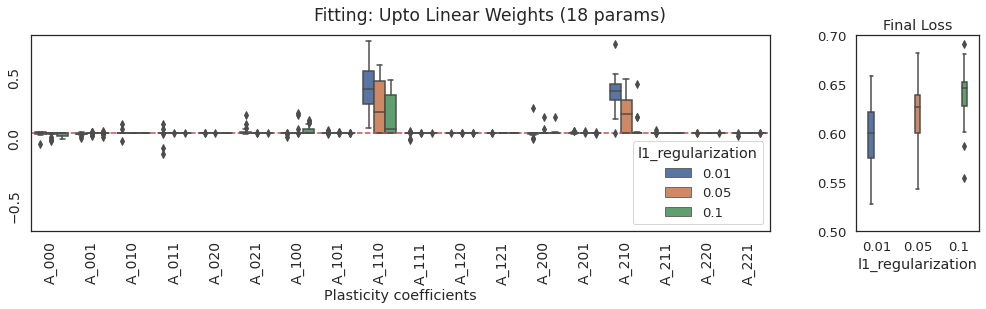

In [45]:
sns.set(font_scale = 1.2)
sns.set_style("white")
plt.tight_layout()

fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(17, 4), width_ratios=[6,1])

fig.suptitle('Fitting: Upto Linear Weights (18 params)', fontsize="large")

axes[0].axhline(y=0, color='r', linestyle='--')
sns.boxplot(data=melted_df, x="coeff_name", y="coeff_val", hue="l1_regularization", ax=axes[0])
axes[0].set_xlabel("Plasticity coefficients")
axes[0].set_ylabel(None)
axes[0].set_ylim([-0.8, 0.8])
axes[0].tick_params(labelrotation=90, which="major", labelsize=14, color="black", direction='out')
axes[0].legend(title='l1_regularization')

axes[1].set_title('Final Loss')
sns.boxplot(data=df_subset, x="l1_regularization", y="loss", hue="l1_regularization", width=0.4, ax=axes[1])
axes[1].set_xlabel("l1_regularization")
axes[1].set_ylabel(None)
axes[1].set_ylim([0.50, 0.7])

axes[1].get_legend().remove()
fig.subplots_adjust(bottom=0.2)

plt.savefig(f"l1_reg.png", dpi=500)